<a href="https://colab.research.google.com/github/juanmartinezitm/Optimizacion/blob/master/Semana%201/MAO_Clase_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Repaso de álgebra lineal**

- Vectores
- Subespacios
- Normas
- Producto interno
- Eigenvalores y eigenvectores

La información de este repaso se obtuvo en gran parte de los siguientes repositorios:

https://madewithml.com/topics/linear-algebra/

## Vectores

Un vector es una colección de números 

https://es.wikipedia.org/wiki/Vector

$\Re:$ eje real \\
$\Re^n:$ espacio euclideano n-dimensional \\
\begin{equation}
\bf{x} = 
\begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix}
\in \Re^n
\end{equation}


In [ ]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)
        plt.grid(True)

(2, 1)


(-2.0, 2.0)

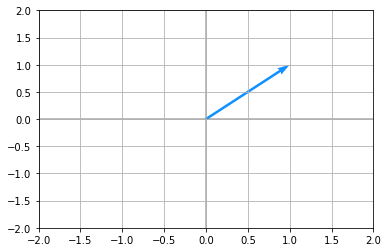

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definición de vector en R^2

#Por facilidad para operaciones en Python, definiremos los vectores como matrices de numpy de nx1

x = np.matrix([1,1]).T
print(x.shape)

fig  = plt.figure()
ax = fig.add_subplot(111)
plotVectors([np.array(x).flatten()], cols=['#1190FF'])
plt.ylim(-2, 2)
plt.xlim(-2, 2)

(3, 1)


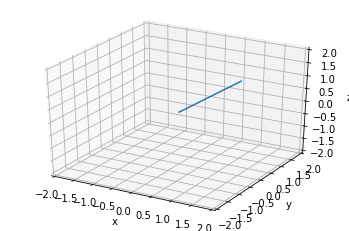

In [ ]:
x = np.matrix([1,1,1]).T
ori= np.matrix([0.,0.,0.]).T

print(x.shape)

fig  = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([ori[0,0], x[0,0]], [ori[1,0], x[1,0]],zs=[ori[2,0], x[2,0]])
ax.set_xlim([-2,2]) 
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.grid(True) 

## Subespacios

Un subespacio vectorial $\mathcal{S}$ de $\Re^n$ es un subconjunto no vacío (también de $\Re^n$) que cumple las siguientes reglas:

1. Si $\bf{x}, \bf{y} \in \mathcal{S}$, entonces $\alpha \bf{x} + \beta \bf{y} \in \mathcal{S} \quad \forall \alpha,\beta \in \Re$.
2. Si $\bf{x} \in \mathcal{S}$, entonces $\alpha \bf{x} \in \mathcal{S} \quad \forall \alpha \in \Re$

Sean $\bf{x}, \bf{y} \in \Re^n (\mathcal{S})$, el subespacio lineal es la combinación  



## Subespacio lineal ($\mathcal{S}$)

Sean $\bf{x}, \bf{y} \in \mathcal{S}$, el subespacio lineal es el resultado de las combinaciones lineales $\alpha \bf{x} + \beta \bf{y} \in \mathcal{S} \quad \forall \alpha,\beta \in \Re$.

**Tarea:** Demostrar que el subespacio lineal es en verdad un subespacio de $\Re^n$.

(2, 1)


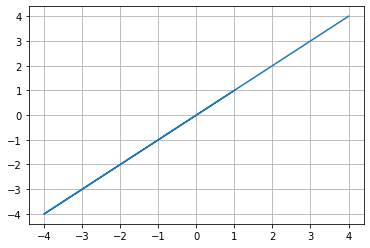

In [ ]:
x = np.matrix([1,1]).T
y = np.matrix([1,1]).T

a = np.linspace(-2,2,100)
b = np.linspace(-2,2,100)

S = np.empty_like(x)
print(S.shape)
for i in range(len(a)):
  for j in range(len(b)):
    v = a[i]*x + b[j]*y
    S = np.append(S,v,axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(S[0,:].T,S[1,:].T)
ax.grid(True)

## Subespacio afín ($\mathcal{Q}$)

Un subespacio afín $\mathcal{Q}$ se puede definir a partir del subespacio lineal $\mathcal{S}$ de la siguiente forma:

\begin{equation}
\mathcal{Q} = \mathcal{S} + \bf{b} = \{ \bf{y} = \bf{x} + \bf{b} : \bf{x} \in \mathcal{S}, b \in \Re^n \} 
\end{equation}

**Tarea:** Demostrar que si $\bf{v}, \bf{w} \in \mathcal{Q}$, entonces $\alpha \bf{v} + \beta \bf{w} \in \mathcal{Q}$ ssi $\alpha + \beta = 1$



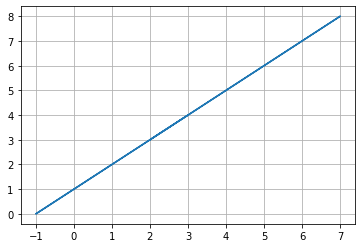

In [ ]:
x = np.matrix([1,1]).T
y = np.matrix([1,1]).T
b = np.matrix([2,3]).T

alpha = np.linspace(-2,2,100)
beta = 1 - alpha

Q = np.empty_like(x)

for i in range(len(alpha)):
  for j in range(len(beta)):
    v = alpha[i]*x + beta[j]*y + b
    Q = np.append(Q,v,axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Q[0,:].T,Q[1,:].T)
ax.grid(True)

**Tarea:** Graficar subespacios lineales y afines de $\Re^3$

## Norma vectorial

La norma de un vector $\bf{x}$, denotada como $||\bf{x}||$, es una función que cumple con las siguientes propiedades:

1. $||\mathbf{x}|| \geq 0$ 
2. $||\mathbf{x}|| = 0$ ssi $||\bf{x}|| = \bf{0}$ 
3. $||\alpha \mathbf{x}|| = |\alpha| ||\mathbf{x}||$
4. $||\mathbf{x}+\mathbf{y}||\leq||\mathbf{x}|| + ||\mathbf{y}||$

- **Norma euclideana**

$\displaystyle ||\mathbf{x}||_2 =(\sum_{i=1}^n |x_i|^2)^{\frac{1}{2}} = (\mathbf{x}^{\top} \mathbf{x})^{\frac{1}{2}}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.mat([1,2]).T
norm_x = np.linalg.norm(x)

y = np.mat([2,3]).T
norm_y = np.linalg.norm(y)

z = x + y

norm_z = np.linalg.norm(z)

print(norm_x + norm_y, norm_z)

5.841619252963779 5.830951894845301


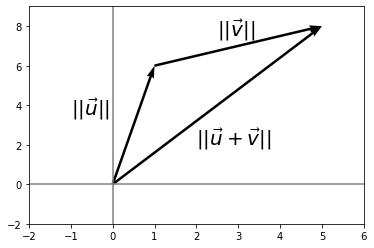

In [ ]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1)
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$',  size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$',  size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', size=20)

plt.show()
plt.close()



- **Norma $l_p$**

$\displaystyle ||\mathbf{x}||_p =(\sum_{i=1}^n |x_i|^p)^{\frac{1}{p}}$

- **Norma $l_1$**

$\displaystyle ||\mathbf{x}||_1 =\sum_{i=1}^n |x_i|$

- **Norma $l_\infty$**

$\displaystyle ||\mathbf{x}||_\infty =\max_i{|x_i|}$


# Norma matricial

- **Norma Frobenius**

$||\mathbf{A}||_F = (\sum_{i,j} (a_{i,j})2)^{\frac{1}{2}} = tr(\mathbf{A}^{\top} \mathbf{A})$

# Producto interno
Sean $\mathbf{x}, \mathbf{y} \in \Re^n$, el producto interno entre estos dos vectores están definidos como:

$<\mathbf{x},\mathbf{y}> = \mathbf{x}^{\top}\mathbf{y} =\sum_{i=1}^m x_iy_i$

La norma euclidea $l_2$ se puede definir a partir del producto interno como:

$||\mathbf{x}||_2 = (<\mathbf{x},\mathbf{x}>)^{\frac{1}{2}}$

# Producto interno matricial

$<\mathbf{A},\mathbf{B}>_F = tr(\mathbf{A}^{\top} \mathbf{B}) = \sum_{i,j} a_{i,j}b_{i,j} = tr(\mathbf{A}\mathbf{B}^{\top})$

# Matrices como transformaciones lineales

Podemos pensar en las matrices como transformaciones lineales. Algunas matrices rotarán su espacio de coordenadas, otras lo re-escalarán. Así, cuando aplicamos una matriz a un vector, terminamos con una versión transformada de nuestro vector.



(-3.0, 3.0)

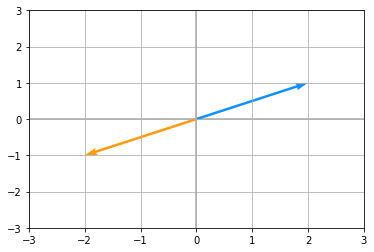

In [ ]:
A = np.matrix([[-1, 0], [0, -1]])
x = np.matrix([2,1]).T

xt = A @ x

fig  = plt.figure()
ax = fig.add_subplot(111)
vecs = []
vecs.append(np.array(x).flatten())
vecs.append(np.array(xt).flatten())

plotVectors(vecs,cols=['#1190FF', '#FF9A13'])
plt.ylim(-3, 3)
plt.xlim(-3, 3)


# Eigenvalores y Eigenvectores

Sea $\mathbf{A} \in \Re^{n \times n}$, su eigendescomposición está dada por:

\begin{equation}
\mathbf{A}\mathbf{s}_k = \lambda_k \mathbf{s}_k
\end{equation}

donde $\mathbf{s}_k \in \Re^{n \times 1}$ es el $k-$ésimo eigenvector de $\mathbf{A}$ y $\lambda_k \in \Re$ el eigenvalor relacionado con el $k-$ésimo eigenvector. Esto significa que el vector de salida es una versión escalada del vector de entrada.



[6. 2.]
[[ 0.70710678 -0.31622777]
 [ 0.70710678  0.9486833 ]]


(-1.0, 5.0)

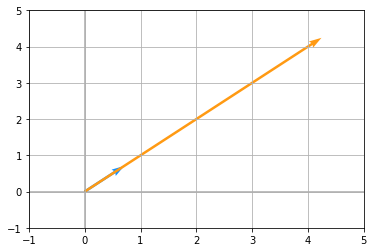

In [ ]:
A = np.matrix([[5, 1], [3, 3]])
eigvals,eigvecs = np.linalg.eig(A)

print(eigvals)
print(eigvecs)

s0 = eigvecs[:,0]
l0 = eigvals[0]

left = A@s0
right = l0 * s0

fig  = plt.figure()
ax = fig.add_subplot(111)
vecs = []
vecs.append(np.array(s0).flatten())
vecs.append(np.array(left).flatten())

plotVectors(vecs,cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 5)
plt.xlim(-1, 5)

# Descomposición en eigenvalores y eigenvectores

Sea $\mathbf{A} \in \Re^{n \times n}$ una matriz con $n$ eigenvectores linealmente independientes, entonces:

\begin{equation}
\mathbf{S} = 
\begin{bmatrix}
\mathbf{s}_1 & | & \ldots | \mathbf{s}_n
\end{bmatrix} \in \Re^{n \times n}
\end{equation}

\begin{equation}
\mathbf{\Lambda} = 
\begin{bmatrix}
\lambda_1 & 0 & \ldots 0 \\
0         & \lambda_2 & \ldots & 0 \\
\vdots    & \vdots    & \vdots & \vdots \\
0         & 0         & \ldots & \lambda_n 
\end{bmatrix} \in \Re^{n \times n}
\end{equation}

Entonces 

\begin{align}
\mathbf{AS} &= \mathbf{S \Lambda}\\
\mathbf{A} &= \mathbf{S \Lambda} \mathbf{S}^{-1}
\end{align}

Si $\mathbf{s}_i \bot \mathbf{s}_j$, entonces:

\begin{align}
\mathbf{AS} &= \mathbf{S \Lambda}\\
\mathbf{A} &= \mathbf{S \Lambda} \mathbf{S}^{T}
\end{align}

Si $\mathbf{A} \in \Re^{n \times n}$ es simétrica, entonces sus eigenvalores serán ortogonales. ¿Por qué?



# Operaciones con eigenvalores y eigenvectores

\begin{align*}
\mathbf{A} &= \mathbf{S} \mathbf{\Lambda} \mathbf{S}^{\top} \\
\mathbf{A}^{-1} & = \\
\mathbf{A}^{2} & = \\
\mathbf{A}^{p} & = \\
\end{align*}

# Tarea

1. Comprobar las propiedades anteriores para alguna matrix.
2. Consultar la descomposición en valores singulares. ¿Cuál es la relación entre los valores singulares y los eigenvalores? ¿Cuál es la relación entre los vectores singulares y los eigenvectores?